## Analyzing Anime data with Python

This project is about analysing and filtering out user required animes and movies

If you love anime, you'll enjoy this analysis I did with Python. This data comes from the Kaggle, and you can download a version of it from the link below here. 
<br>
Link: https://www.kaggle.com/CooperUnion/anime-recommendations-database

### Loading up libaries

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt2
from matplotlib.pyplot import figure
from IPython import display

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/Gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Gdrive


In [ ]:
df=pd.read_csv('/content/Gdrive/My Drive/DATASETS/anime.csv')

In [ ]:
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


It's always a good practice to use this command, everytime you import a new dataset. It'll begin a better understanding of the structure of the dataset.

Note: An important thing to keep in mind is that the genre consists of "strings", not a list of strings. It'll be useful in the future

### Understanding our Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


As you can see it's a relatively large dataset, with around 13k rows <br>
From the above information, We can understand the data type and count of each attribute

### Types in Anime

In [ ]:
import matplotlib.pyplot as plt

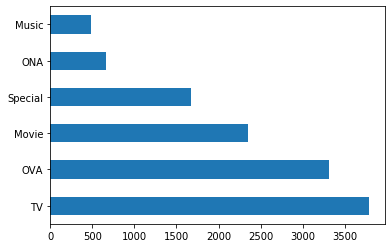

In [ ]:
df.type.value_counts().plot(kind="barh")

As we can see from the above graph, We have a wide variety of content available in our dataset, ranging from music to tv series.


### Histogram of Ratings

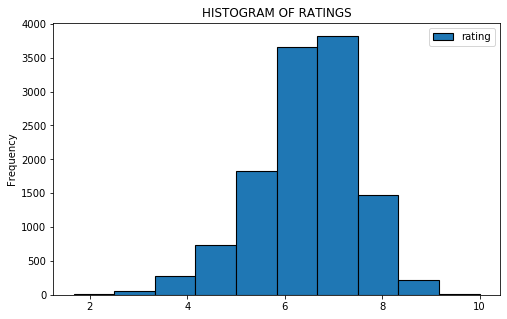

In [ ]:
Ratings=df.rating.plot(kind="hist",linewidth=1.1,edgecolor='black',figsize=(8,5),title="HISTOGRAM OF RATINGS",legend=bool)

Here. The X-Axis represents the Ratings, <br>
while the Y-Axis represents the Number of Animes that fall into that specific range of ratings.
<br>
We can see that most animes fall into the range of 6 and 8, and only a select few animes are in the extreme ends of the rating scale, as you would expect.

## List of all unique genres

In [ ]:
genres=[]
for x in df.genre.dropna():  #Removing any missing value found in the dataframe
    if x not in genres:
        genres.append(x)     #Appending all the genres into a new list

In [ ]:
genres=str(genres)
s=""
for x in genres:
    if x!="'" and x!="[" and x!="]":
        s=s+x

Genre=s.split(", ") 

In [ ]:
L=list(dict.fromkeys(Genre))
L.sort()
print(L)

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


## Categories of Genres

In [ ]:
df["genre"]=df["genre"].str.split(", ")   ## Splitting the genres into a list of strings                               
df.dropna(inplace = True)                 ## Dropping all missing values

In [ ]:
g=[]
for x in df.genre:                   ## Appending all the genres into a new list
    g.extend(x)

In [ ]:
c=0
c2=[]
for x in L:                       ## L -> List of unique genres
    for y in g:                   ## G -> List of all genres in the dataset
        if y==x:
            c=c+1                
    c2.append(c)
    c=0

In [ ]:
d = {'Genres': L, 'Anime_Count': c2}
df2 = pd.DataFrame(data=d)

# Display the DataFrame
display.display(df2)

# Adjust the output height to 300px.
display.Javascript("google.colab.output.setIframeHeight('300px');")

,Genres,Anime_Count
0,Action,2768
1,Adventure,2316
2,Cars,72
3,Comedy,4575
4,Dementia,238
5,Demons,287
6,Drama,1977
7,Ecchi,628
8,Fantasy,2242
9,Game,177


<IPython.core.display.Javascript object>

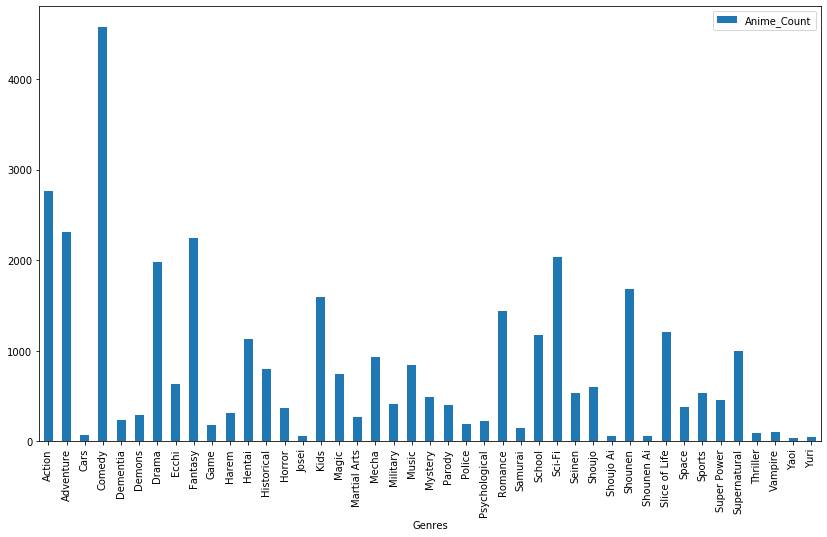

In [ ]:
df2.plot(x='Genres',y='Anime_Count',kind="bar",figsize=(14,8))

From the above graph, We can see Comedy animes are at the top, in terms of anime genres, Followed by Action, Adventure, Fantasy and more. 

## Types of animes (Individual count)

In [ ]:
TYPES=df.type.dropna().unique()
TYPES

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [ ]:
df=pd.read_csv('/content/Gdrive/My Drive/DATASETS/anime.csv')  ## Dataframe genre must be a single string, so we re-read the dataset

In [ ]:
T2=[]
T3=[]
for x in TYPES:
    for y in L:
        T2.append(((df[df["genre"].str.contains(y,na=False)]["type"]==x)).sum())   ## COUNT TYPES OF ALL GENRES
    T3.append(T2)
    T2=[]          # Resetting T2 for next genre
        

In [ ]:
df22=df2                     # Making copy of Anime_Count dataframe
for x in range(0,6):
    df22[TYPES[x]]=T3[x]
DFT=df22.drop(['Anime_Count'],axis=1)   

display.display(DFT)
display.Javascript("google.colab.output.setIframeHeight('300px');")

,Genres,Movie,TV,OVA,Special,Music,ONA
0,Action,572,1098,680,357,17,113
1,Adventure,647,932,421,297,9,40
2,Cars,12,36,12,4,1,7
3,Comedy,693,1870,846,903,18,311
4,Dementia,172,9,18,10,18,13
5,Demons,44,89,122,31,1,7
6,Drama,484,697,545,213,26,44
7,Ecchi,32,245,218,127,2,13
8,Fantasy,592,765,518,291,41,97
9,Game,17,103,17,27,0,17


<IPython.core.display.Javascript object>

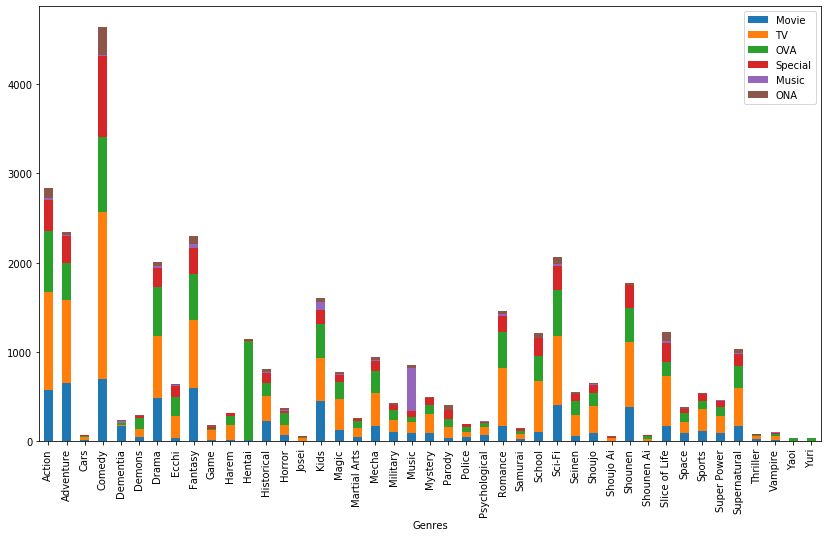

In [ ]:
DFT.plot(x='Genres',kind="bar",stacked=True,figsize=(14,8))

### Top Animes to watch (According to the ratings)

In [ ]:
df[(df.type=="TV") & (df.rating>=9.0)]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47


Nothing surprising here, all amazing shows here. Make sure you check them out, if you haven't! <br>
Personally I would have preferred Hunter X hunter to be in the Top 3, but still can't argue with the choices here, Great shows :D

### Pure Comedy Animes

In [ ]:
df[(df['genre'].isin(["Comedy"])) & (df.type=="TV")].head(10)

,anime_id,name,genre,type,episodes,rating,members
1425,2518,Masuda Kousuke Gekijou Gag Manga Biyori 2,Comedy,TV,12,7.55,1846
1557,1684,Dotto Koni-chan,Comedy,TV,26,7.50,1397
1809,485,Damekko Doubutsu,Comedy,TV,26,7.43,8024
1904,7761,Masuda Kousuke Gekijou Gag Manga Biyori +,Comedy,TV,12,7.41,1123
2040,22013,Ghost in the Shell: Nyuumon Arise,Comedy,TV,26,7.37,4636
2085,4056,Masuda Kousuke Gekijou Gag Manga Biyori 3,Comedy,TV,12,7.36,1615
2388,5397,Usavich III,Comedy,TV,13,7.28,3038
2573,4286,Bonobono (TV),Comedy,TV,48,7.22,418
2580,5983,Higepiyo,Comedy,TV,39,7.22,4427
2892,4742,Papa to Odorou,Comedy,TV,16,7.14,567


Remember how I told that the genres are considered as a line of string. Hence, here if you search for a particular genre, your result will only return animes of that particular genre. It ignores all the other animes which contains the genre you are looking for.

### Top Rated Comedy Animes

In [ ]:
df[df["genre"].str.contains("Comedy",na=False)].head(10)


,anime_id,name,genre,type,episodes,rating,members
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25,8.93,179342
20,263,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
23,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458


Luckily, In Python, We can easily get around that hassle, by using the "contains" function. This will return all the animes that contains your specific genre in them. It's a better alternative(I remembering spending a lotta time on finding this lol)<br>
Also, Did you Notice that Gintama has occupied 5 spots in the Top Comedy series. Just goes to show you, it's popularity :)

### List of all Unique Genres (Reference)

In [ ]:
print(L)

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


## Search for you specific genre!

Enter upto 3 different genres here! Leave a blank if you reached your required number of genres
(Look up the previous cell for the list of genres)

In [ ]:
a=input("Enter the genre#1: ")
b=input("Enter the genre#2: ")
c=input("Enter the genre#3: ")
d=input("Enter the type: ")

Enter the genre#1: Action
Enter the genre#2: Fantasy
Enter the genre#3: Thriller
Enter the type: TV


In [ ]:
SG=df[df["genre"].str.contains(a, na=False) & df["genre"].str.contains(b, na=False) & df["genre"].str.contains(c, na=False)]
SG[SG.type==d]


,anime_id,name,genre,type,episodes,rating,members
36,11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12,8.73,340973
2755,33003,Mahou Shoujo Ikusei Keikaku,"Action, Fantasy, Supernatural, Thriller",TV,12,7.17,46024


Pretty simple filtering tool I made, just in case you are looking for a particular anime to watch. Have fun!

## Data Visualization

### Mean ratings of all genres (Via. LineGraph)

In [ ]:
G2=[]
for x in L:
     G2.append(np.mean(df[df["genre"].str.contains(x,na=False)]["rating"].dropna()))
    

In [ ]:
d = {'Genres': L, 'Mean_Ratings': G2}
df3 = pd.DataFrame(data=d)

display.display(df3)
display.Javascript("google.colab.output.setIframeHeight('300px');")

,Genres,Mean_Ratings
0,Action,6.787150
1,Adventure,6.742539
2,Cars,6.468611
3,Comedy,6.622402
4,Dementia,5.011681
5,Demons,6.676307
6,Drama,6.977218
7,Ecchi,6.666640
8,Fantasy,6.673671
9,Game,6.783333


<IPython.core.display.Javascript object>

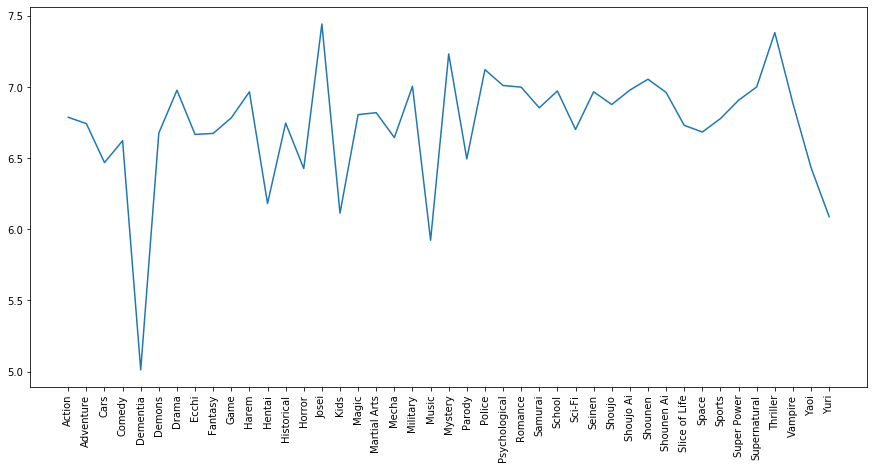

In [ ]:
figure(num=None, figsize=(15,7))

plt2.plot(L, G2)
plt2.xticks(rotation=90)  ##plt2

plt2.show()

We can see a great deal of variation of ratings in all the genre. <br> 
Most noteably, Dementia has the lowest ratings of any other animes. And it's a shame too. Dementia animes are basically animes about short, madness, insanity, mental illness. You just don't see much good shows out of this genre. Music animes are pretty objective, you may find a hidden gem here and there, but most are hard to come by.
<br>
On the flip side, Josei,Thriller, Mystery animes are peaking in this list. I, personally, haven't seen much of Josei animes, probably because the target demographic is for the ladies. And yeah. It's a delight to see Thriller and Mystery coming out in the tops, We have many great shows worth watching

### Episode count of all genres (Via. LineGraph)

In [ ]:
G3=[]
x=df[df.episodes=="Unknown"].index  ## Removing Animes with Unknown episodes 
y=df.drop(x)
for x in L:
    G3.append(sum(y[y["genre"].str.contains(x,na=False)]["episodes"].dropna().astype('int32')))

In [ ]:
d = {'Genres': L, 'Episode_Count': G3}
df4 = pd.DataFrame(data=d)

display.display(df4)
display.Javascript("google.colab.output.setIframeHeight('300px');")

,Genres,Episode_Count
0,Action,36506
1,Adventure,40358
2,Cars,1304
3,Comedy,77403
4,Dementia,467
5,Demons,3129
6,Drama,21399
7,Ecchi,4829
8,Fantasy,30379
9,Game,3838


<IPython.core.display.Javascript object>

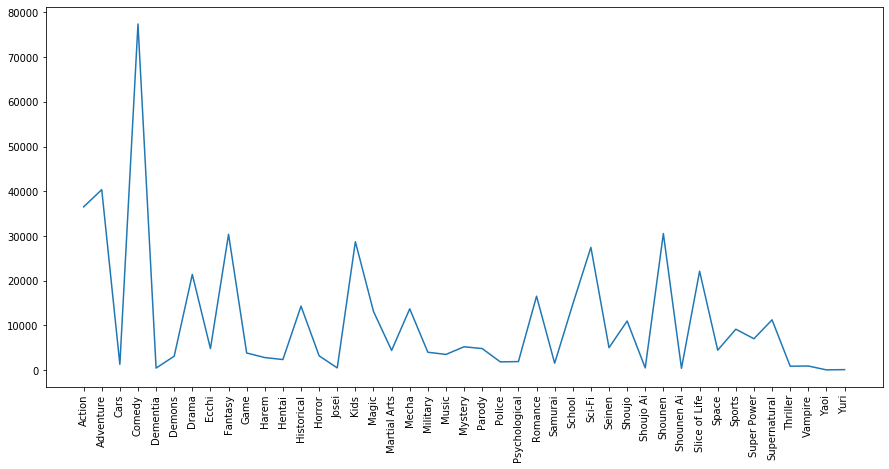

In [ ]:
figure(num=None, figsize=(15,7))

plt2.plot(L, G3)
plt2.xticks(rotation=90)
plt2.show()

Nothing surprising here. Popular genres such as Comedy, Drama, Fantasy have the largest number of episodes. And I think, the reason Comedy is on the top is because almost every anime include that tag, just because lol. It's pretty rare to come by a true Laugh out loud kinda comedy, most of the recent animes just have one or two recurring gags.

### Top 10 Longest Animes (Via PieChart)

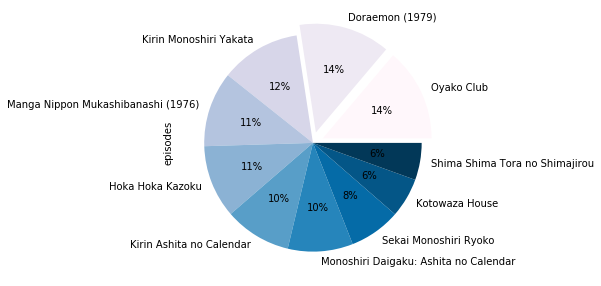

In [ ]:
x=df[df.episodes=="Unknown"].index  ## Removing Animes with Unknown episodes 
y=df.drop(x)

Y=y[['name','episodes']]
Y.episodes=Y.episodes.astype(int)   
Y=Y.sort_values(by='episodes',ascending=False)
explode = (0.1,0.1,0,0,0,0,0,0,0,0)

Y.episodes.head(10).plot.pie(labels=Y.name.head(10),figsize=(5,5),autopct='%1.0f%%',explode=explode,colormap='PuBu')

Ah yes! The only anime I recognize here is Doraemon. Mostly because, I grew up watching it. Most of these animes are been airing for the past 20+ years, Granted that they are slice of life, which is usually easier to animate and storyboard than the other genres.

### Top 10 Highest Rated Movies 

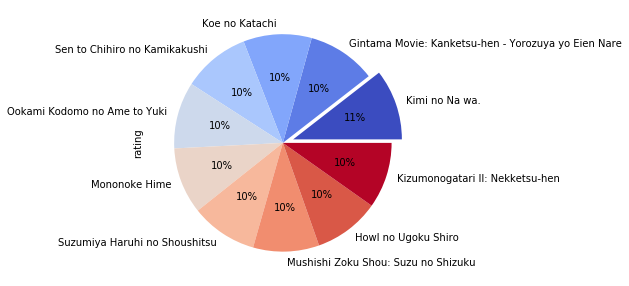

In [ ]:
Y2=df[df.type=="Movie"]
Y=Y2[['name','rating']]

explode = (0.1,0,0,0,0,0,0,0,0,0)

Y.rating.head(10).plot.pie(labels=Y.name.head(10),figsize=(5,5),autopct='%1.0f%%',explode=explode,colormap='coolwarm')

No doubts here, seen all the movies here, and all of them were amazing! Especially the top 1 movie here, Kimi no Nawa. That movie will definitely be remembered as one of the classics of 2017, one of Shinkai's greatest works.

### Correlation between Episodes and Ratings (Via. ScatterPlot)

In [ ]:
G3=[]
x=df[df.episodes=="Unknown"].index  ## Removing Animes with Unknown episodes 
y=df.drop(x)
for x in L:
    G3.append(np.mean(y[y["genre"].str.contains(x,na=False)]["episodes"].dropna().astype('int32')))  
    
    ##Calculating mean of episodes per genre

In [ ]:
d = {'Genres': L, 'Episode_Count': G3}
df4 = pd.DataFrame(data=d)

In [ ]:
E=df4.Episode_Count
df3['Mean_Episodes']=E

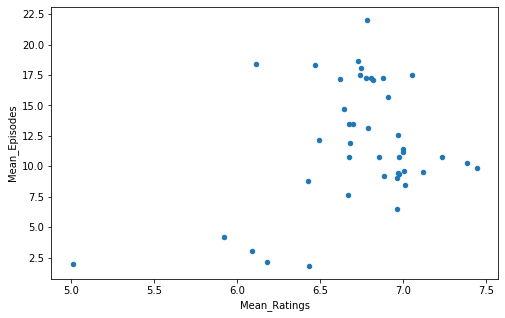

In [ ]:
df3.plot.scatter(x='Mean_Ratings',y='Mean_Episodes',figsize=(8,5))

In [ ]:
df3.corr()

,Mean_Ratings,Mean_Episodes
Mean_Ratings,1.000000,0.311849
Mean_Episodes,0.311849,1.000000


We can observe only a "small positive correlation" between the episodes and ratings. 
Hence, we can conclude saying that increase in episodes can only result in small increase in ratings.
Longer episodes do not necessarily equal better ratings, and vice versa.

### Regression line to our Scatterplot

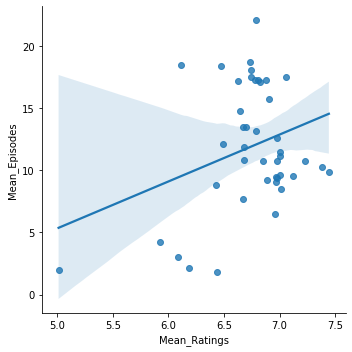

In [ ]:
import seaborn as sns
sns.lmplot(x='Mean_Ratings',y='Mean_Episodes',data=df3,fit_reg=True) 

### Episodes and Ratings comparison (Via. DoubleBarGraph)

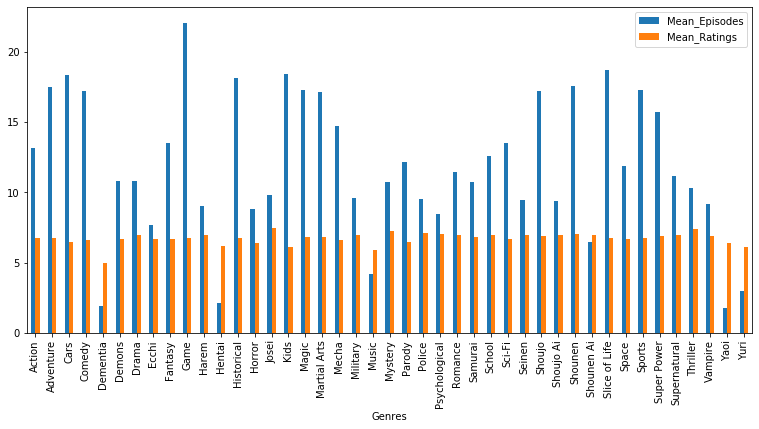

In [ ]:
df3.plot(x="Genres",y=["Mean_Episodes","Mean_Ratings"],kind="bar",figsize=(13,6))

### Type count of each genre (Via. Lineplot)

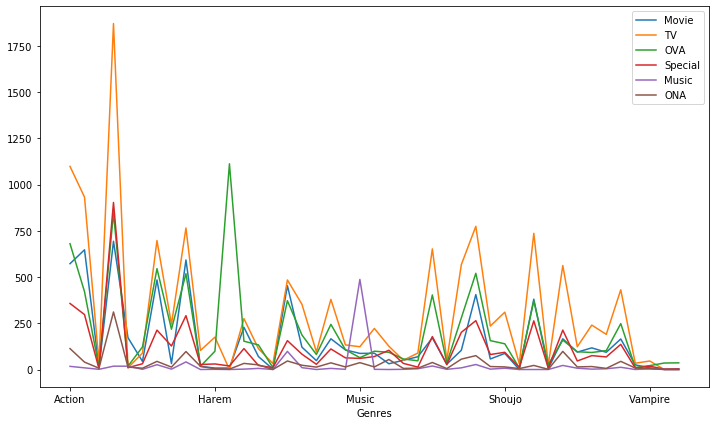

In [ ]:
DFT.plot(x="Genres",figsize=(12,7))

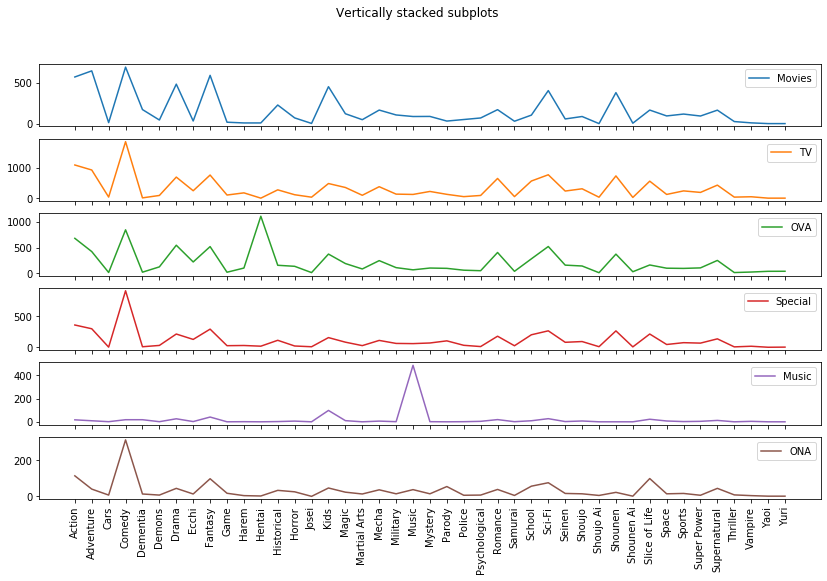

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6,figsize=(14,8),sharex=True)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(DFT.Genres, DFT.Movie, label="Movies")
axs[0].legend(loc="upper right")

axs[1].plot(DFT.Genres, DFT.TV,'tab:orange',label="TV")
axs[1].legend(loc="upper right")

axs[2].plot(DFT.Genres, DFT.OVA,'tab:green',label="OVA")
axs[2].legend(loc="upper right")

axs[3].plot(DFT.Genres, DFT.Special,'tab:red',label="Special")
axs[3].legend(loc="upper right")

axs[4].plot(DFT.Genres, DFT.Music,'tab:purple',label="Music")
axs[4].legend(loc="upper right")

axs[5].plot(DFT.Genres, DFT.ONA,'tab:brown',label="ONA")
axs[5].legend(loc="upper right")

plt.xticks(rotation=90)
plt.show()
